# DATA ANALYSIS OF GOOGLE APP'S RATINGS

### Import the Required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read Data

Please ensure that your folder name <span style="color:red">**does not have a space or a forward slash(/)**</span>

In [2]:
google_data = pd.read_csv('googleplaystore.csv')

In [3]:
google_data.head()         #Inspecting the first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google_data.shape

(10841, 13)

In [5]:
google_data.describe()       # Summary Statistics

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


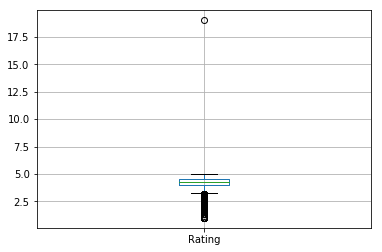

In [6]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6C8D45B70>]],
      dtype=object)

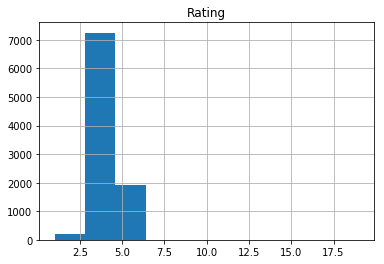

In [7]:
google_data.hist()

In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data Cleaning

#### Count the number of missing values in the Dataframe

In [9]:
google_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Count the number of missing values in each column
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Check how many ratings are more than 5 - Outliers

In [11]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
google_data.drop([10472],inplace=True)

In [13]:
google_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


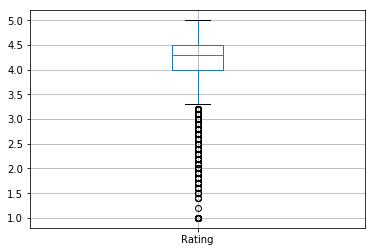

In [14]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6CC940358>]],
      dtype=object)

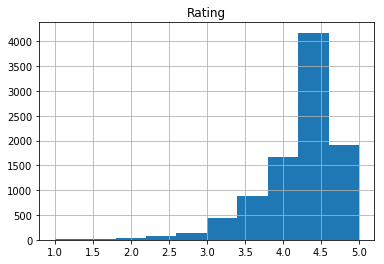

In [15]:
google_data.hist()

### Remove columns that are 90% empty

In [16]:
threshold = len(google_data)* 0.1
threshold

1084.0

In [17]:
google_data.dropna(thresh=threshold, axis=1, inplace=True)

In [18]:
print(google_data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


### Data Imputation and Manipulation

#### <span style="color:blue">Fill the  null values </span>with appropriate values using <span style="color:green">aggregate functions</span> such as <span style="color:red">mean, median or mode.</span>

In [19]:
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())

In [20]:
google_data.Rating = google_data['Rating'].transform(impute_median) 

In [21]:
#count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [22]:
# modes of categorical values
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [23]:
# Fill the missing categorical values with mode
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace=True)

In [24]:
#count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
### Let's convert Price, Reviews and Ratings into Numerical Values
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else str(x))
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'], errors='coerce')

In [26]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [27]:
google_data.head(10) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [28]:
google_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


### Data Visualization

In [29]:
grp = google_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

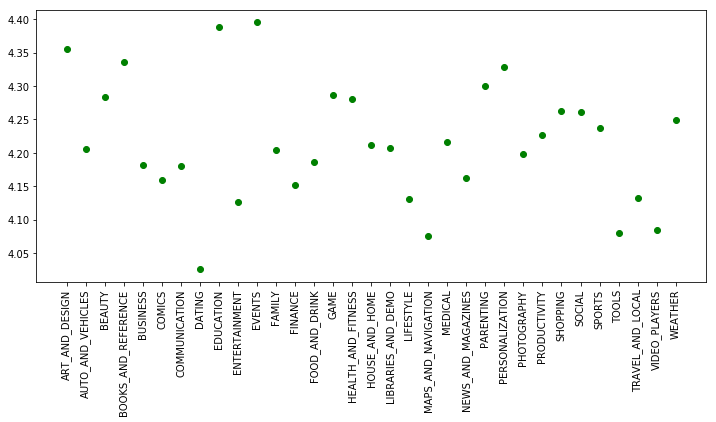

In [30]:
plt.figure(figsize=(12,5))
plt.plot(x, "ro", color='g')
plt.xticks(rotation=90)
plt.show()

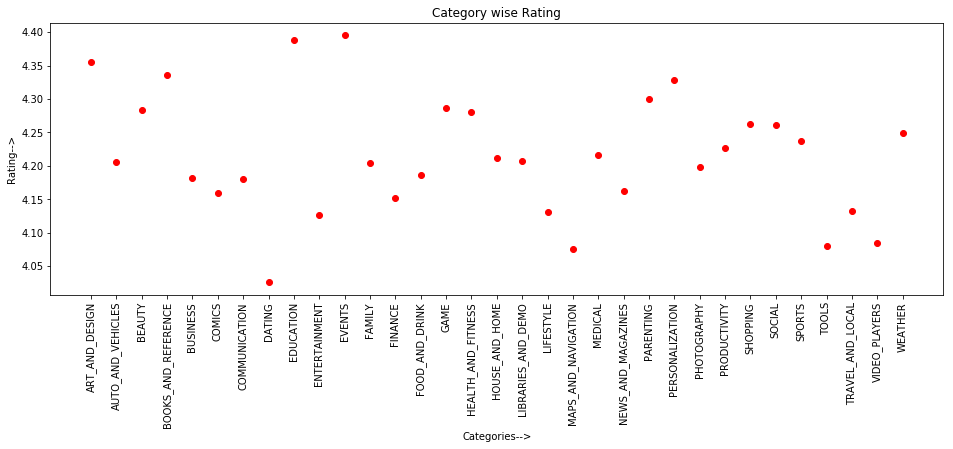

In [31]:
##Analysed ratings of all apps with repect to all categories
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

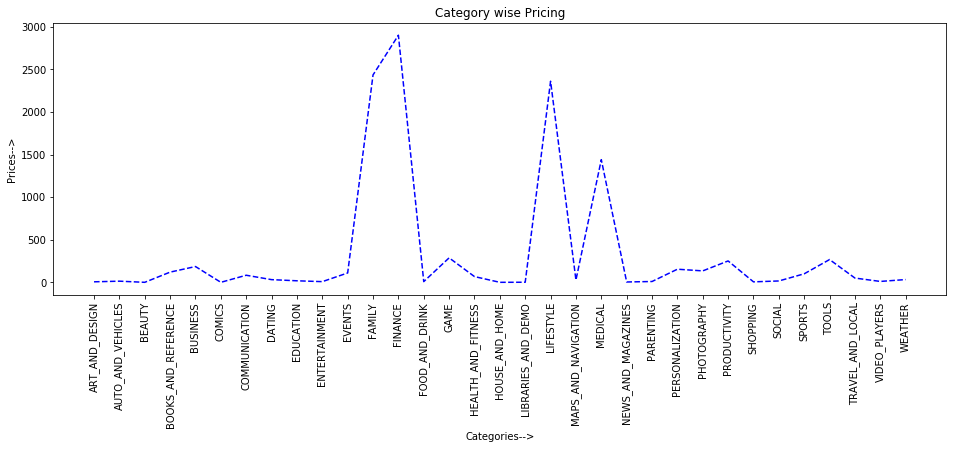

In [32]:
##Analysed prices of all apps with repect to all categories
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

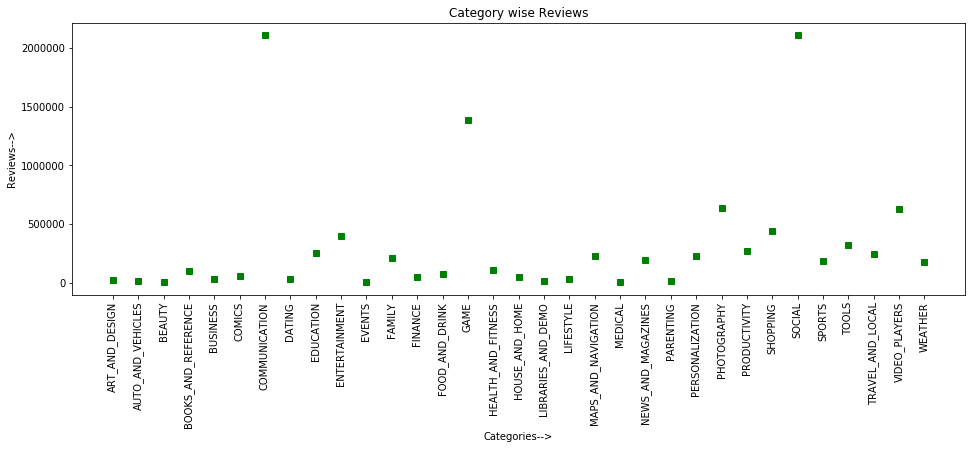

In [33]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

In [34]:
data1=google_data.groupby('Content Rating')
print(data1)

In [35]:
##Analysed content rating of various apps with respect to all ratings
x1=data1["Rating"].agg(np.mean)
print(x1)

Content Rating
Adults only 18+    4.300000
Everyone           4.203248
Everyone 10+       4.258937
Mature 17+         4.136874
Teen               4.240315
Unrated            4.200000
Name: Rating, dtype: float64


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

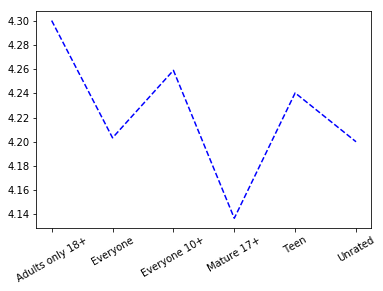

In [36]:
plt.plot(x1,'r--', color='b')
plt.xticks(rotation=30)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

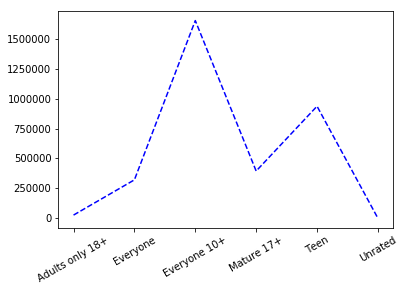

In [37]:
##Analyzed content rating of various apps with respect to reviews
x1=data1["Reviews"].agg(np.mean)
plt.plot(x1,'r--', color='b')
plt.xticks(rotation=30)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

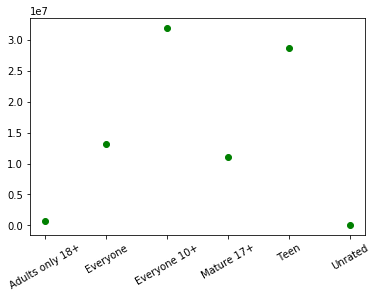

In [38]:
##Analyzed content rating of various apps with respect to Installs
x1=data1["Installs"].agg(np.mean)
plt.plot(x1,'ro', color='g')
plt.xticks(rotation=30)

Type
Free    1.668929e+07
Paid    9.119510e+04
Name: Installs, dtype: float64


([0, 1], <a list of 2 Text xticklabel objects>)

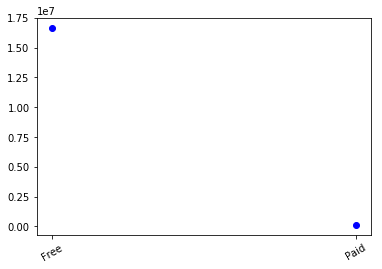

In [39]:
data1=google_data.groupby('Type')
x1=data1["Installs"].agg(np.mean)
print(x1)
plt.plot(x1,'ro', color='b')
plt.xticks(rotation=30)

In [40]:
##count the number of apps for kids by searching the kids keywords in app names
data1=google_data["App"]
list1=[]
for i in data1:
    list1.append(i)
#print(list1)
count=0
list3=['text','play','kids','fun','game']
list4=[]

for i in list1:
    list2=[]
    list2.append(i.split())
    #print(list2)
    for j in list2:
        for k in j:
            if k.lower() in list3:
                count=count+1
                list4.append(i)
                #print(i)
#print(list4)
print("count is",count)

count is 324


In [41]:
#google_data["App"]=google_data[i for i in list4]
list5=[]
for i in list4:
    hello=google_data[google_data["App"]==i]["Installs"].tolist()
    list5.append(hello)
count=0
result = []
for sublist in list5:
    for item in sublist:
        result.append(item)

print(sum(result))

22680329906.0


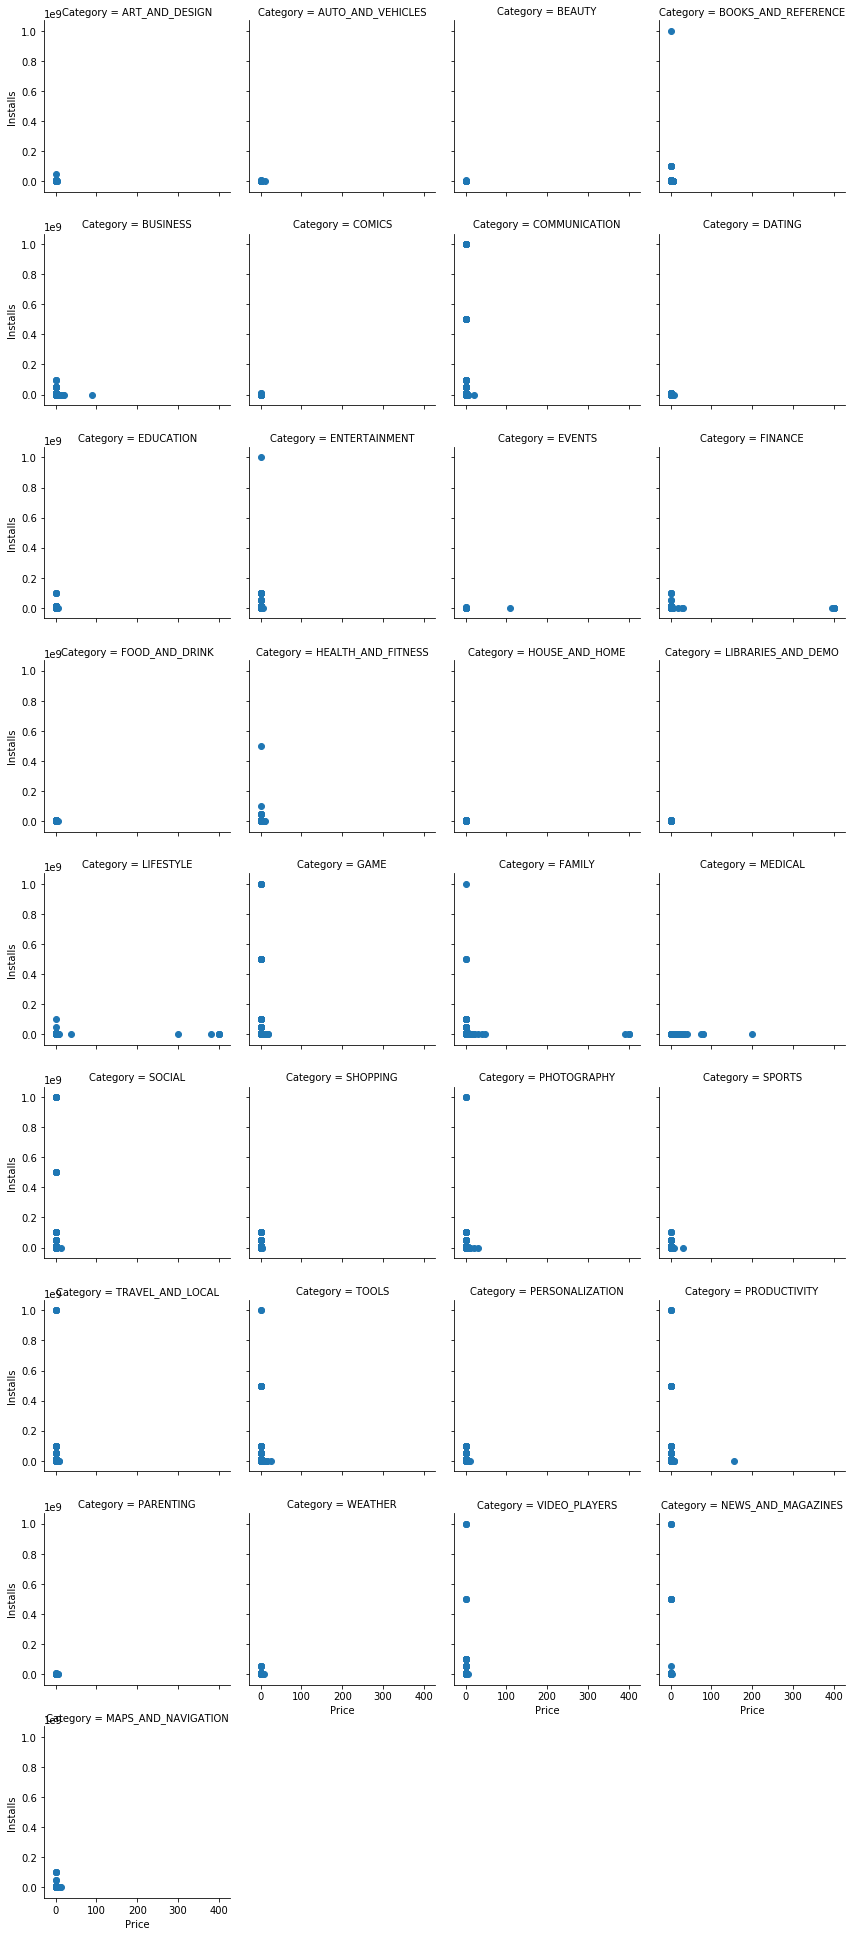

In [42]:
##Visiualised the relation between the prices and installs of each category of various apps 
grid = sns.FacetGrid(google_data, col='Category',col_wrap=4)
grid.map(plt.scatter,'Price','Installs',alpha = 1.0)
sns.despine()


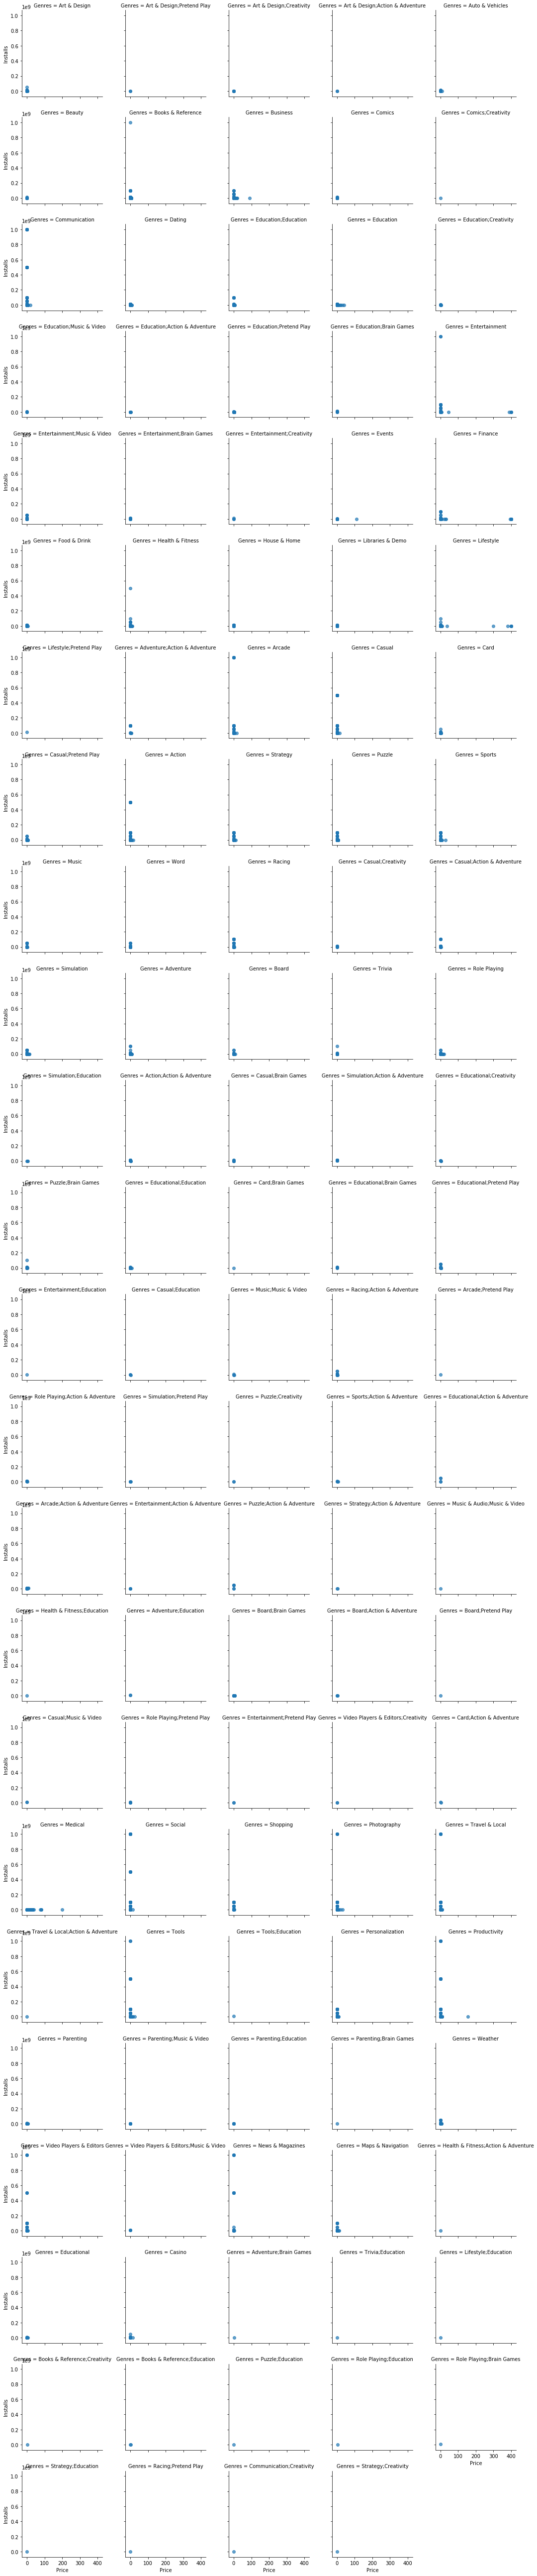

In [43]:
##Visiualised the relation between the prices and installs of each genres of various apps 
grid = sns.FacetGrid(google_data, col='Genres',col_wrap=5)
grid.map(plt.scatter,'Price','Installs',alpha = 0.7)
sns.despine()

# CONCLUSION

#### 1.Highest rating is given to the apps of categories education , event and art & culture.
#### 2.Highest reviews is given to the apps of categories communication,social and game.
#### 3.Highest prices is given to the apps of categories finance,family and lifestyle.
#### 4.Highest ratings is given to the apps of content rating 'Adults only 18+'
#### 5.Highest ratings is given to the apps of content rating 'Everyone 10+'
#### 6.Highest number of installs for the type of content rating is 'Everyone 10+' and 'Teen'
#### 7.Number of installed apps for free apps is much more than paid apps.
#### 8.For apps of categories Business,Finance & Medical, Users have installed the more paid apps as compared to other categories.
#### 9.For apps of genres Entertainment,Finance & Lifestyle, Users have installed the more paid apps as compared to other genres.